# Trabalho 1 - Nivelamento

Considere os datasets abaixo, estratégias de pré-processamento, medidas de avaliação, métodos de comparação estatística e os seguintes algoritmos de aprendizado de máquina: árvore de decisão, random forest e k-nearest neighbor. A partir disso, responda as seguintes perguntas:

1. Qual o algoritmo de AM mais adequado para cada problema?
2. Qual o algoritmo de AM mais adequado para todos os problemas?

Para responder essas questões construa um notebook no colab ou um ambiente similar. Documente de forma clara cada passo e justifique suas decisões.

In [1]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import matplotlib.patches as mpatches
import matplotlib as plt
from scipy.io import arff
import urllib.request
import pandas as pd
import numpy as np
import io

In [2]:
PhishingWebsites_link = "https://www.openml.org/data/download/1798106/phpV5QYya"
arrhythmia_link       = "https://www.openml.org/data/download/53551/arrhythmia.arff"
Satellite_link        = "https://www.openml.org/data/download/16787463/phpZrCzJR"
airlines_link         = "https://www.openml.org/data/download/66526/phpvcoG8S"
AedesSex_link         = "https://github.com/denismr/Classification-and-Counting-with-Recurrent-Contexts/raw/master/codeAndData/data/AedesSex.csv"
phoneme_link          = "https://www.openml.org/data/download/1592281/php8Mz7BG"
adult_link            = "https://www.openml.org/data/download/1595261/phpMawTba"

In [3]:
def loadDataset_Arff(url: str) -> pd.DataFrame:
  ftpstream = urllib.request.urlopen(url)
  return pd.DataFrame(arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))[0])
  
def get_dummies(df: pd.DataFrame, col:str) -> pd.DataFrame:
  return pd.get_dummies(df,prefix=col,prefix_sep='.',columns=[col]).copy()

In [4]:
def select_nominals(dataset: pd.DataFrame) -> list:
    """
    Seleciona os atributos não numéricos do dataset.
    """
    att: list = []
    for i, v in dataset.dtypes.items():
        if(v == "object"):
            att.append(i)
    return att

def is_binary_nominal(nominals: list) -> "tuple[bool, list[str]]":
    """
    Retorna se uma lista de atributos nominais contém apenas 2 valores distintos ou não.
    """
    unique_att: "list[str]" = []
    for n in nominals:
        if(not n in unique_att):
            unique_att.append(n)
    return len(unique_att) == 2, unique_att

In [5]:
def convert_binary_nominal_to_numeric(dataset: pd.DataFrame, attribute: str) -> pd.DataFrame:
    """
    Converte atributos nominais binários de um dataset para numéricos binários (0 ou 1).
    """
    new_dt = dataset.copy()
    attributes = new_dt[attribute]
    unq_attr: dict['str', int] = {}
    # Pegando os atributos únicos
    i = 0
    for a in attributes:
        if(not a in unq_attr):
            unq_attr[a] = i
            i += 1
    # Substituindo os valores nominais por numéricos.
    for u in unq_attr:
        new_dt.loc[new_dt[attribute] == u, attribute] = unq_attr[u]
    return new_dt

In [6]:
def convert_nominal_to_numeric(dataset: pd.DataFrame) -> pd.DataFrame:
    """
    Converte todos os atributos nominais de um dataset para atributos numéricos.
    """
    nominals = select_nominals(dataset)
    new_dt = dataset.copy()
    for att in nominals:
        binary, values = is_binary_nominal(new_dt[att])
        if(binary): # Atributo nominal binário
            new_dt = convert_binary_nominal_to_numeric(new_dt, att)
        else: # Atributo nominal não binário
            new_dt = get_dummies(new_dt, att)
    return new_dt

In [7]:
def proportion(Dataset,target="Target"):
  target_count = Dataset[target].value_counts()
  print('Class 0:', target_count[0])
  print('Class 1:', target_count[1])
  target_count.plot(kind='bar', title='Count (target)');
  
def normalize(dataset,target='Target') -> pd.DataFrame:
  # Separação dos dados preditivos e dos valores
  X = dataset.drop([target], axis=1).copy()
  Y = dataset[target].copy()

  # Normalização
  scaler = MinMaxScaler()
  X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
  dataset = X
  dataset[target] = Y
  return dataset

In [8]:
def knn(dataset,n_neighbors=3,target='Target'):
  X_train, X_test, y_train, y_test = train_test_split(dataset.drop([target], axis=1), dataset[target], test_size=0.3)
  model = KNeighborsClassifier(n_neighbors=3)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(accuracy_score(y_test, y_pred)*100)

def treeDecision(dataset,target='Target'):
  X_train, X_test, y_train, y_test = train_test_split(dataset.drop([target], axis=1), dataset[target], test_size=0.3)
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(accuracy_score(y_test, y_pred)*100)

def RForestDecision(dataset,target='Target'):
  X_train, X_test, y_train, y_test = train_test_split(dataset.drop([target], axis=1), dataset[target], test_size=0.3)
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(accuracy_score(y_test, y_pred)*100)
  

In [ ]:
# from sklearn.model_selection import cross_val_score

# y = df_balanced['Target']
# x = df_balanced.drop(['Target'],axis=1)
# classificador = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
# cv_result_enhanced = cross_val_score(classificador, x, y, cv=20, scoring="accuracy")
# print("Acurácia com cross validation:", cv_result_enhanced.mean()*100)

In [9]:
def TTS_knn(dataset, x ,y ,n_neighbors=3):
  model = KNeighborsClassifier(n_neighbors=3)
  return cross_val_score(model, x, y, cv=20, scoring="accuracy")

def TTS_treeDecision(dataset, x ,y):
  model = DecisionTreeClassifier()
  return cross_val_score(model, x, y, cv=20, scoring="accuracy")

def TTS_RForestDecision(dataset, x ,y):
  model = RandomForestClassifier()
  return cross_val_score(model, x, y, cv=20, scoring="accuracy")

In [114]:
def selectAttributes(dataset):
  model = DecisionTreeClassifier()#max_leaf_nodes=10
  feature_ = RFE(model,n_features_to_select=5, step=1)
  return feature_.fit(dataset.drop(['Target'],axis=1),dataset['Target']).support_

def removeColumns(dataset):
  attributes = selectAttributes(dataset)
  dropListIndex = np.where(attributes == False)[0]
  dropList = []
  for index in dropListIndex:
    dropList.append(dataset.columns[index])
  return dropList


# Lendo todos os datasets

In [56]:
# InitDataset_PhishingWebsites = loadDataset_Arff(PhishingWebsites_link)
# InitDataset_arrhythmia = loadDataset_Arff(arrhythmia_link)
# InitDataset_Satellite = loadDataset_Arff(Satellite_link)
InitDataset_airlines = loadDataset_Arff(airlines_link)
# InitDataset_AedesSex = pd.read_csv(AedesSex_link)
# InitDataset_phoneme = loadDataset_Arff(phoneme_link)
# InitDataset_adult = loadDataset_Arff(adult_link)

Abaixo será feito a conversão das classes targets para True e False, e trocado o nome da coluna para Target para as que não estão. Também será feito uma analise de distribuição e procura de dados nominais.

In [115]:
Dataset_PhishingWebsites = InitDataset_PhishingWebsites.copy()
Dataset_PhishingWebsites['Target'] = [True if x == '-1'.encode() else False for x in Dataset_PhishingWebsites['Result']]
Dataset_PhishingWebsites = Dataset_PhishingWebsites.drop(['Result'],axis=1)
Dataset_PhishingWebsites = Dataset_PhishingWebsites.drop(removeColumns(Dataset_PhishingWebsites),axis=1)

In [ ]:
Dataset_arrhythmia = InitDataset_arrhythmia.copy()
Dataset_arrhythmia['Target'] = [True if x == 'P'.encode() else False for x in Dataset_arrhythmia['binaryClass']]
Dataset_arrhythmia = Dataset_arrhythmia.drop(['binaryClass'],axis=1) #Remoção da coluna J por ter 98% dos dados NaN
Dataset_arrhythmia = Dataset_arrhythmia.drop(removeColumns(Dataset_arrhythmia),axis=1) 
Dataset_arrhythmia = Dataset_arrhythmia.dropna() #Remoção das linhas com valores faltantes

In [117]:
##Sem nominais usando a função select_nominals
Dataset_Satellite = InitDataset_Satellite.copy()
Dataset_Satellite['Target'] = [True if x == 'Anomaly'.encode() else False for x in Dataset_Satellite['Target']]
Dataset_Satellite = Dataset_Satellite.drop(removeColumns(Dataset_Satellite),axis=1) 

In [119]:
##Dataset com muitos dados nominais, para aplicar o knn será necessário usar a função getdummies em AirportFrom e AirportTo.
Dataset_airlines = InitDataset_airlines.copy()
Dataset_airlines['Target'] = [True if x == '1'.encode() else False for x in Dataset_airlines['Delay']]
Dataset_airlines = Dataset_airlines.drop(['Delay'],axis=1)
Dataset_airlines['Airline'] = [x.decode('UTF-8') for x in Dataset_airlines['Airline']]
Dataset_airlines['DayOfWeek'] = [int(x.decode('UTF-8')) for x in Dataset_airlines['DayOfWeek']]
Dataset_airlines['AirportFrom'] = [x.decode('UTF-8') for x in Dataset_airlines['AirportFrom']]
Dataset_airlines['AirportTo'] = [x.decode('UTF-8') for x in Dataset_airlines['AirportTo']]

Dataset_airlines = get_dummies(Dataset_airlines,'AirportFrom')
Dataset_airlines = get_dummies(Dataset_airlines,'AirportTo')
Dataset_airlines = Dataset_airlines.drop(removeColumns(Dataset_airlines),axis=1) 

: 

: 

In [33]:
Dataset_AedesSex = InitDataset_AedesSex.copy()
Dataset_AedesSex['Target'] = [True if x == 'F' else False for x in Dataset_AedesSex['sex']]
Dataset_AedesSex = Dataset_AedesSex.drop(['sex'],axis=1)
Dataset_AedesSex = Dataset_AedesSex.drop(removeColumns(Dataset_AedesSex),axis=1) 

In [34]:
##Dataset desbalanceado, analisar como se comporta nos algoritmos de aprendizagem para saber se é necessário balancear.
Dataset_phoneme = InitDataset_phoneme.copy()
Dataset_phoneme['Target'] = [True if x == '1'.encode() else False for x in Dataset_phoneme['Class']]
Dataset_phoneme = Dataset_phoneme.drop(['Class'],axis=1)
Dataset_phoneme = Dataset_phoneme.drop(removeColumns(Dataset_phoneme),axis=1)

In [35]:
# ##Dataset com muitas colunas nominais, será necessário gerar o dummie das mesmas.
Dataset_adult = InitDataset_adult.copy()
Dataset_adult['Target'] = [True if x == '<=50K'.encode() else False for x in Dataset_adult['class']]
Dataset_adult = Dataset_adult.drop(['class'],axis=1)
Dataset_adult['workclass'] = [x.decode('UTF-8') for x in Dataset_adult['workclass']]
Dataset_adult['education'] = [x.decode('UTF-8') for x in Dataset_adult['education']]
Dataset_adult['marital-status'] = [x.decode('UTF-8') for x in Dataset_adult['marital-status']]
Dataset_adult['occupation'] = [x.decode('UTF-8') for x in Dataset_adult['occupation']]
Dataset_adult['relationship'] = [x.decode('UTF-8') for x in Dataset_adult['relationship']]
Dataset_adult['race'] = [x.decode('UTF-8') for x in Dataset_adult['race']]
Dataset_adult['sex'] = [x.decode('UTF-8') for x in Dataset_adult['sex']]
Dataset_adult['native-country'] = [x.decode('UTF-8') for x in Dataset_adult['native-country']]

Dataset_adult = Dataset_adult.dropna() #Remoção das linhas com valores faltantes

Dataset_adult = get_dummies(Dataset_adult,'workclass')
Dataset_adult = get_dummies(Dataset_adult,'education')
Dataset_adult = get_dummies(Dataset_adult,'marital-status')
Dataset_adult = get_dummies(Dataset_adult,'occupation')
Dataset_adult = get_dummies(Dataset_adult,'relationship')
Dataset_adult = get_dummies(Dataset_adult,'race')
Dataset_adult = get_dummies(Dataset_adult,'sex')
Dataset_adult = get_dummies(Dataset_adult,'native-country')
Dataset_adult = Dataset_adult.drop(removeColumns(Dataset_adult),axis=1)
# Dataset_adult

Normalização de todos os datasets

In [45]:
NOR_Dataset_PhishingWebsites = normalize(Dataset_PhishingWebsites)
NOR_Dataset_arrhythmia = normalize(Dataset_arrhythmia)
NOR_Dataset_Satellite = normalize(Dataset_Satellite) #DESBALANCEADO
NOR_Dataset_AedesSex = normalize(Dataset_AedesSex)
NOR_Dataset_phoneme = normalize(Dataset_phoneme)
NOR_Dataset_adult = normalize(Dataset_adult)
## #NOR_Dataset_airlines = normalize(Dataset_airlines) # Dataset estourando a memoria.

NOR_Dataset_arrhythmia = NOR_Dataset_arrhythmia.dropna()

Class 0: 1586
Class 1: 3818


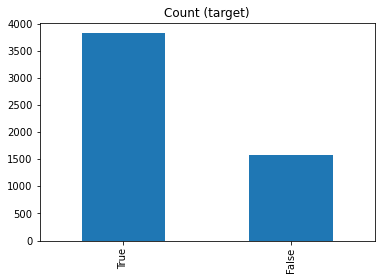

In [55]:
proportion(NOR_Dataset_phoneme)

Aplicando o knn em todos os datasets para saber a acurácia.

In [ ]:
knn(NOR_Dataset_PhishingWebsites) #93.8498643352427
# knn(NOR_Dataset_arrhythmia) 
knn(NOR_Dataset_Satellite) #99.2156862745098
knn(NOR_Dataset_AedesSex) #98.73611111111111
knn(NOR_Dataset_phoneme) #88.03945745992601
knn(NOR_Dataset_adult) #81.71022998703337


treeDecision(NOR_Dataset_PhishingWebsites)#96.02050045221586
# treeDecision(NOR_Dataset_arrhythmia)
treeDecision(NOR_Dataset_Satellite)#99.08496732026144
treeDecision(NOR_Dataset_AedesSex)#98.19444444444444
treeDecision(NOR_Dataset_phoneme)#87.05302096177559
treeDecision(NOR_Dataset_adult)#82.01733433426602


RForestDecision(NOR_Dataset_PhishingWebsites)#96.80434127223396
# RForestDecision(NOR_Dataset_arrhythmia)
RForestDecision(NOR_Dataset_Satellite)#99.281045751634
RForestDecision(NOR_Dataset_AedesSex)#98.38888888888889
RForestDecision(NOR_Dataset_phoneme)#90.9987669543773
RForestDecision(NOR_Dataset_adult)#85.68893741895857



In [47]:
NOR_Dataset_PhishingWebsites_y = NOR_Dataset_PhishingWebsites['Target']
NOR_Dataset_PhishingWebsites_x = NOR_Dataset_PhishingWebsites.drop(['Target'],axis=1)

NOR_Dataset_Satellite_y = NOR_Dataset_Satellite['Target']
NOR_Dataset_Satellite_x = NOR_Dataset_Satellite.drop(['Target'],axis=1)

NOR_Dataset_AedesSex_y = NOR_Dataset_AedesSex['Target']
NOR_Dataset_AedesSex_x = NOR_Dataset_AedesSex.drop(['Target'],axis=1)

NOR_Dataset_phoneme_y = NOR_Dataset_phoneme['Target']
NOR_Dataset_phoneme_x = NOR_Dataset_phoneme.drop(['Target'],axis=1)

NOR_Dataset_adult_y = NOR_Dataset_adult['Target']
NOR_Dataset_adult_x = NOR_Dataset_adult.drop(['Target'],axis=1)

In [48]:

precisionListKnn = np.array([])
precisionListKnn = np.append(precisionListKnn,TTS_knn(NOR_Dataset_PhishingWebsites,NOR_Dataset_PhishingWebsites_x,NOR_Dataset_PhishingWebsites_y) ) 
precisionListKnn = np.append(precisionListKnn,TTS_knn(NOR_Dataset_Satellite,NOR_Dataset_Satellite_x,NOR_Dataset_Satellite_y) ) 
precisionListKnn = np.append(precisionListKnn,TTS_knn(NOR_Dataset_AedesSex,NOR_Dataset_AedesSex_x,NOR_Dataset_AedesSex_y) ) 
precisionListKnn = np.append(precisionListKnn,TTS_knn(NOR_Dataset_phoneme,NOR_Dataset_phoneme_x,NOR_Dataset_phoneme_y) ) 
precisionListKnn = np.append(precisionListKnn,TTS_knn(NOR_Dataset_adult,NOR_Dataset_adult_x,NOR_Dataset_adult_y) ) 
precisionListKnn.mean()*100


precisionListTree = np.array([])
precisionListTree = np.append(precisionListTree,TTS_treeDecision(NOR_Dataset_PhishingWebsites,NOR_Dataset_PhishingWebsites_x,NOR_Dataset_PhishingWebsites_y) ) 
precisionListTree = np.append(precisionListTree,TTS_treeDecision(NOR_Dataset_Satellite,NOR_Dataset_Satellite_x,NOR_Dataset_Satellite_y) ) 
precisionListTree = np.append(precisionListTree,TTS_treeDecision(NOR_Dataset_AedesSex,NOR_Dataset_AedesSex_x,NOR_Dataset_AedesSex_y) ) 
precisionListTree = np.append(precisionListTree,TTS_treeDecision(NOR_Dataset_phoneme,NOR_Dataset_phoneme_x,NOR_Dataset_phoneme_y) ) 
precisionListTree = np.append(precisionListTree,TTS_treeDecision(NOR_Dataset_adult,NOR_Dataset_adult_x,NOR_Dataset_adult_y) ) 
precisionListTree.mean()*100

precisionListRf = np.array([])
precisionListRf = np.append(precisionListRf,TTS_RForestDecision(NOR_Dataset_PhishingWebsites,NOR_Dataset_PhishingWebsites_x,NOR_Dataset_PhishingWebsites_y) ) 
precisionListRf = np.append(precisionListRf,TTS_RForestDecision(NOR_Dataset_Satellite,NOR_Dataset_Satellite_x,NOR_Dataset_Satellite_y) ) 
precisionListRf = np.append(precisionListRf,TTS_RForestDecision(NOR_Dataset_AedesSex,NOR_Dataset_AedesSex_x,NOR_Dataset_AedesSex_y) ) 
precisionListRf = np.append(precisionListRf,TTS_RForestDecision(NOR_Dataset_phoneme,NOR_Dataset_phoneme_x,NOR_Dataset_phoneme_y) ) 
precisionListRf = np.append(precisionListRf,TTS_RForestDecision(NOR_Dataset_adult,NOR_Dataset_adult_x,NOR_Dataset_adult_y) ) 
precisionListRf.mean()*100

print((precisionListKnn.mean()*100),(precisionListTree.mean()*100),(precisionListRf.mean()*100))

92.73600233667308